In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, Minimizer, minimize, report_fit, Model

import scqubits as scq

In [3]:
osc = scq.Oscillator(E_osc = 1)
gq = scq.GenericQubit(E = 1)

g = 0.1
hilbertspace = scq.HilbertSpace([gq, osc])

hilbertspace.add_interaction(
    g_strength = g,
    op1 = osc.annihilation_operator,
    op2 = gq.sp_operator,
    add_hc = True
)

In [4]:
dressed_hamiltonian = hilbertspace.hamiltonian()
evals, evecs = hilbertspace.eigensys(evals_count=12)

print(hilbertspace, dressed_hamiltonian, evals, evecs)

HilbertSpace:  subsystems
-------------------------

GenericQubit--------|
                    | E: 1
                    |
                    | dim: 2


Oscillator----------|
                    | E_osc: 1
                    | l_osc: None
                    | truncated_dim: 6
                    |
                    | dim: 6



HilbertSpace:  interaction terms
--------------------------------

InteractionTerm----------|
                         | g_strength: 0.1
                         | operator_list: [(1, array([[0.        , 1.        , 0.        , 0 ...
                         | add_hc: True

 Quantum object: dims = [[2, 6], [2, 6]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.          0.
   0.1         0.          0.          0.          0.          0.        ]
 [ 0.    

In [5]:
def update_hilbertspace(E, detuning):
    gq.E = E
    osc.E_osc = E + detuning

x = np.linspace(0, 10, 101)

pname1 = 'E'
E_vals = x
pname3 = 'detuning'
detuning_vals = x

paramvals_by_name = {pname1: E_vals, pname3: detuning_vals}

sweep = scq.ParameterSweep(
    hilbertspace=hilbertspace,
    paramvals_by_name=paramvals_by_name,
    update_hilbertspace=update_hilbertspace,
    evals_count=3,
    num_cpus=4
)

Parallel compute bare eigensys [num_cpus=4]

Parallel compute bare eigensys [num_cpus=4]

Parallel compute dressed eigensys [num_cpus=4]

In [6]:
def jc(x, e):
    e_index = int(10*e)
    return sweep["evals"][e_index, :]

jc_model = Model(jc)

print(jc_model.param_names, jc_model.independent_vars)

['e'] ['x']


In [7]:
jc_data = jc(x, 8.1)
jc_noise = jc_data + 0.1*np.random.normal(size=jc_data.shape)
jc_data_1 = jc(x, 7.6)

In [8]:
print(jc_data, jc_noise, jc_data_1)

[[-4.05        3.95        4.15      ]
 [-4.05        3.9881966   4.2118034 ]
 [-4.05        4.00857864  4.29142136]
 [-4.05        4.01972244  4.38027756]
 [-4.05        4.0263932   4.4736068 ]
 [-4.05        4.03074176  4.56925824]
 [-4.05        4.03377223  4.66622777]
 [-4.05        4.03599451  4.76400549]
 [-4.05        4.03768944  4.86231056]
 [-4.05        4.03902278  4.96097722]
 [-4.05        4.04009805  5.05990195]
 [-4.05        4.04098301  5.15901699]
 [-4.05        4.04172375  5.25827625]
 [-4.05        4.04235268  5.35764732]
 [-4.05        4.04289322  5.45710678]
 [-4.05        4.0433627   5.5566373 ]
 [-4.05        4.04377423  5.65622577]
 [-4.05        4.04413786  5.75586214]
 [-4.05        4.04446149  5.85553851]
 [-4.05        4.04475134  5.95524866]
 [-4.05        4.04501244  6.05498756]
 [-4.05        4.04524884  6.15475116]
 [-4.05        4.0454639   6.2545361 ]
 [-4.05        4.04566036  6.35433964]
 [-4.05        4.04584054  6.45415946]
 [-4.05        4.04600638

In [22]:
result = jc_model.fit(jc_noise, x=x, e=5)

print(result.fit_report())

[[Model]]
    Model(jc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 303
    # variables        = 1
    chi-square         = 731.156372
    reduced chi-square = 2.42104759
    Akaike info crit   = 268.911048
    Bayesian info crit = 272.624780
##  Warning: uncertainties could not be estimated:
    e:  at initial value
[[Variables]]
    e:  5.00000000 (init = 5)


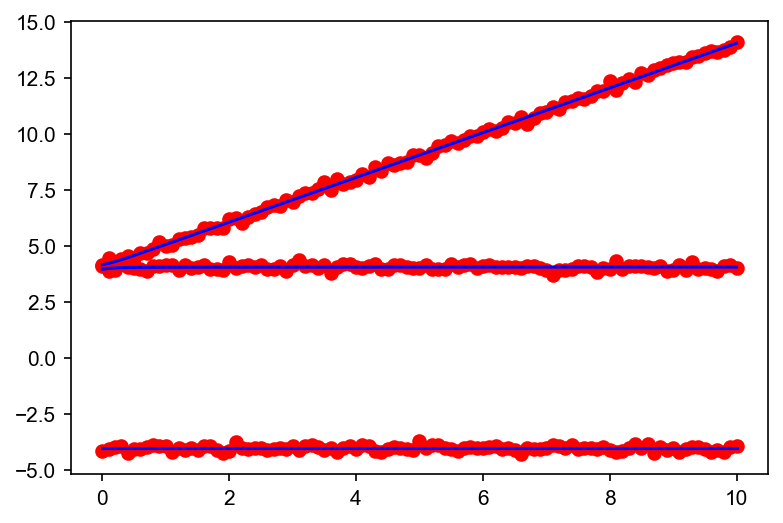

In [10]:
plt.plot(x, jc_noise, 'ro')
plt.plot(x, jc_data, 'b')
plt.show()